# Import Libraries

In [21]:
# Library Import
import pandas as pd
from datetime import datetime
now = datetime.now()

import random
import string

In [22]:
# Configure Parameters
START_ID =1500
INPUT_FILE_PATH = "vv/raw_input.xlsx"

# Import Data

In [23]:
df = pd.read_excel(INPUT_FILE_PATH,sheet_name='Sheet1')
df.head()

,id,submitdate,lastpage,startlanguage,token,startdate,datestamp,Update,UOID,MoSD1,...,QHeRAMS511x[3],QHeRAMS512,QHeRAMS512x[1],QHeRAMS512x[2],QHeRAMS512x[3],QHeRAMS513,QHeRAMS513x[1],QHeRAMS513x[2],QHeRAMS513x[3],ENR
0,5,2023-10-19,16,en,6c6RTtz1XJaiWKW,2023-10-19,2023-10-19,2023-10-19,D9R1E,NaN,...,A4,A3,A4,A3,NaN,A1,NaN,NaN,NaN,NaN
1,2,2023-10-19,16,en,6c6RTtz1XJaiWKW,2023-10-19,2023-10-19,2023-10-19,X5J0S,NaN,...,A3,A4,NaN,NaN,NaN,A1,NaN,NaN,NaN,NaN
2,6,2023-10-19,16,en,1T16p29Z5FR4hgq,2023-10-19,2023-10-19,2023-10-19,E7O3N,NaN,...,A4,A4,NaN,NaN,NaN,A4,NaN,NaN,NaN,NaN
3,7,2023-10-19,16,en,1T16p29Z5FR4hgq,2023-10-19,2023-10-19,2023-10-19,Q4Q2E,NaN,...,NaN,A4,NaN,NaN,NaN,A1,NaN,NaN,NaN,NaN
4,8,2023-10-19,16,en,1T16p29Z5FR4hgq,2023-10-19,2023-10-19,2023-10-19,A1D3B,NaN,...,NaN,A4,NaN,NaN,NaN,A2,A3,NaN,NaN,NaN


In [24]:
df.shape

(117, 563)

# Data Cleaning and Exploration

In [25]:
# Drop rows where MoSD2 is missing
df = df.dropna(subset=['MoSD2'])

# Reset index for dropped rows
df.reset_index(inplace=True, drop=True)

In [26]:
#Replace [ with _ and ] with empty_string
df.rename(columns=lambda s: s.replace("[", "_"), inplace=True)
df.rename(columns=lambda s: s.replace("]", ""), inplace=True)

In [27]:
# Convert and format the Date columns
df['startdate'] = pd.to_datetime(df['startdate']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['submitdate'] = pd.to_datetime(df['submitdate']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['datestamp'] = pd.to_datetime(df['datestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
df['Update'] = pd.to_datetime(df['Update']).dt.strftime('%Y-%m-%d %H:%M:%S')

df.head()

,id,submitdate,lastpage,startlanguage,token,startdate,datestamp,Update,UOID,MoSD1,...,QHeRAMS511x_3,QHeRAMS512,QHeRAMS512x_1,QHeRAMS512x_2,QHeRAMS512x_3,QHeRAMS513,QHeRAMS513x_1,QHeRAMS513x_2,QHeRAMS513x_3,ENR
0,8,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,A1D3B,NaN,...,NaN,A4,NaN,NaN,NaN,A2,A3,NaN,NaN,NaN
1,9,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,X6N9I,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,N9Q0G,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,2023-10-19 00:00:00,16,en,42UOMVDsP8y84ut,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,J2H7F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,2023-10-19 00:00:00,16,en,42UOMVDsP8y84ut,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,V1F0L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# The new size of df
print(df.shape)
print("(Row x Column)")

df.to_csv('vv/test.csv')

(102, 563)
(Row x Column)


array([<Axes: xlabel='HF Type', ylabel='HF Count'>], dtype=object)

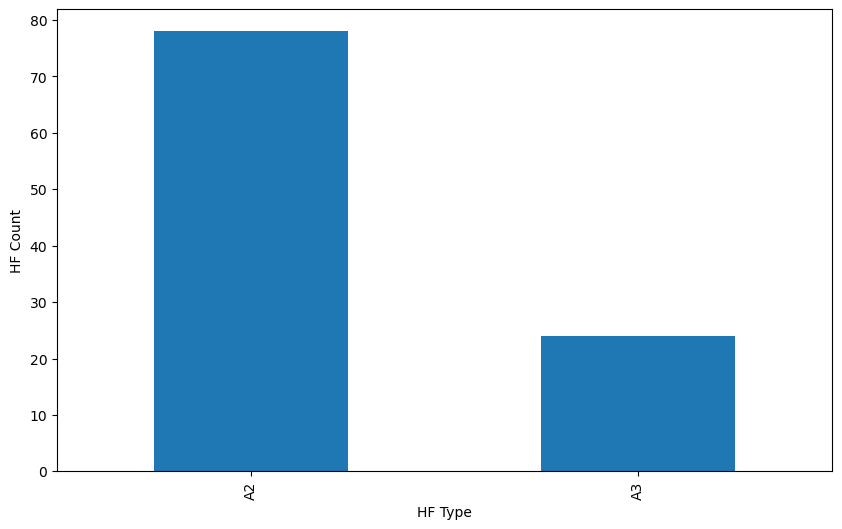

In [29]:
# See the overall HFs by Type 

# Group by Hf Type
dfg = df.groupby(['MoSD3']).size()

# Plot
dfg.plot(kind='bar', ylabel='HF Count',
         xlabel='HF Type', figsize=(10, 6), subplots=True)

In [30]:
# Generate Unique Code 
# In Excel , it is equal to: =CHAR(RANDBETWEEN(65,90))&RANDBETWEEN(0,9)&CHAR(RANDBETWEEN(65,90))&RANDBETWEEN(0,9)&CHAR(RANDBETWEEN(65,90))
def generate_random_code():
    return ''.join([
        random.choice(string.ascii_uppercase),
        str(random.randint(0, 9)),
        random.choice(string.ascii_uppercase),
        str(random.randint(0, 9)),
        random.choice(string.ascii_uppercase)
    ])

# Example usage:
# random_string = generate_random_code()
# print(random_string)

In [31]:
# Generate a unique UOID if not exist
df['UOID'] = df['UOID'].apply(lambda x: generate_random_code() if pd.isna(x) or x == '' else x)

df.head()        

,id,submitdate,lastpage,startlanguage,token,startdate,datestamp,Update,UOID,MoSD1,...,QHeRAMS511x_3,QHeRAMS512,QHeRAMS512x_1,QHeRAMS512x_2,QHeRAMS512x_3,QHeRAMS513,QHeRAMS513x_1,QHeRAMS513x_2,QHeRAMS513x_3,ENR
0,8,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,A1D3B,NaN,...,NaN,A4,NaN,NaN,NaN,A2,A3,NaN,NaN,NaN
1,9,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,X6N9I,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,N9Q0G,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,2023-10-19 00:00:00,16,en,42UOMVDsP8y84ut,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,J2H7F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,2023-10-19 00:00:00,16,en,42UOMVDsP8y84ut,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,V1F0L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Generate unique IDs starting from 1000 and assign to 'ExistingColumn'
df['id'] = range(START_ID, START_ID + len(df))
df.head()

,id,submitdate,lastpage,startlanguage,token,startdate,datestamp,Update,UOID,MoSD1,...,QHeRAMS511x_3,QHeRAMS512,QHeRAMS512x_1,QHeRAMS512x_2,QHeRAMS512x_3,QHeRAMS513,QHeRAMS513x_1,QHeRAMS513x_2,QHeRAMS513x_3,ENR
0,1500,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,A1D3B,NaN,...,NaN,A4,NaN,NaN,NaN,A2,A3,NaN,NaN,NaN
1,1501,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,X6N9I,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1502,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,N9Q0G,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503,2023-10-19 00:00:00,16,en,42UOMVDsP8y84ut,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,J2H7F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1504,2023-10-19 00:00:00,16,en,42UOMVDsP8y84ut,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,V1F0L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Replace empty and null values with "{question_not_shown}"
df.fillna('{question_not_shown}', inplace=True)
df.head()

,id,submitdate,lastpage,startlanguage,token,startdate,datestamp,Update,UOID,MoSD1,...,QHeRAMS511x_3,QHeRAMS512,QHeRAMS512x_1,QHeRAMS512x_2,QHeRAMS512x_3,QHeRAMS513,QHeRAMS513x_1,QHeRAMS513x_2,QHeRAMS513x_3,ENR
0,1500,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,A1D3B,{question_not_shown},...,{question_not_shown},A4,{question_not_shown},{question_not_shown},{question_not_shown},A2,A3,{question_not_shown},{question_not_shown},{question_not_shown}
1,1501,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,X6N9I,{question_not_shown},...,{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown}
2,1502,2023-10-19 00:00:00,16,en,1T16p29Z5FR4hgq,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,N9Q0G,{question_not_shown},...,{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown}
3,1503,2023-10-19 00:00:00,16,en,42UOMVDsP8y84ut,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,J2H7F,{question_not_shown},...,{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown}
4,1504,2023-10-19 00:00:00,16,en,42UOMVDsP8y84ut,2023-10-19 00:00:00,2023-10-19 00:00:00,2023-10-19 00:00:00,V1F0L,{question_not_shown},...,{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown},{question_not_shown}


In [34]:
# Export into CSV without indexing 

date_time = now.strftime("%m%d%Y%H%M%S")
url = "vv/vvimport_{}.csv".format(date_time)
# # Define the VV file header
# vv_header = "V1\tV2\tV3\n"

# # # Export DataFrame to a tab-delimited text file (VV file)
# with open('vv/survey_responses.csv', 'w', encoding='utf-8') as file:
# #     file.write(vv_header)
#     df.to_csv(file, sep='\t', index=False)



df.to_csv(url, sep='\t',index=False)